# Time for a Test Drive!

You've spent some time walking around the Dascar lot, hearing about all the awesome features and specs...

That's enough talk! Let's jump into a racecar and see what it can do!

We'll test drive:

1. Dask DataFrames for faster & scalable pandas
2. Dask Arrays for faster & scalable NumPy
3. Dask-ML for faster & scalable scikit-learn
4. Coiled for cluster spin-up

![](racecar.png "Title")

## Dask DataFrames

The pandas car...with the Dask engine!

In [3]:
import dask.dataframe as dd

In [4]:
%run ../prep_data.py -d flights

data_dir='/Users/rpelgrim/Documents/git/coiled-resources/dask-tutorial/data'


In [5]:
import os

files = os.path.join('../data', 'nycflights', '*.csv')
files

'../data/nycflights/*.csv'

In [6]:
df = dd.read_csv(files,
                 parse_dates={'Date': [0, 1, 2]},
                 dtype={"TailNum": str,
                        "CRSElapsedTime": float,
                        "Cancelled": bool})

In [7]:
df.head()

,Date,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,...,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,Diverted
0,1990-01-01,1,1621.0,1540,1747.0,1701,US,33,NaN,86.0,...,NaN,46.0,41.0,EWR,PIT,319.0,NaN,NaN,False,0
1,1990-01-02,2,1547.0,1540,1700.0,1701,US,33,NaN,73.0,...,NaN,-1.0,7.0,EWR,PIT,319.0,NaN,NaN,False,0
2,1990-01-03,3,1546.0,1540,1710.0,1701,US,33,NaN,84.0,...,NaN,9.0,6.0,EWR,PIT,319.0,NaN,NaN,False,0
3,1990-01-04,4,1542.0,1540,1710.0,1701,US,33,NaN,88.0,...,NaN,9.0,2.0,EWR,PIT,319.0,NaN,NaN,False,0
4,1990-01-05,5,1549.0,1540,1706.0,1701,US,33,NaN,77.0,...,NaN,5.0,9.0,EWR,PIT,319.0,NaN,NaN,False,0


In [10]:
%%time
df.groupby("Origin")["DepDelay"].mean().compute()

CPU times: user 3.33 s, sys: 604 ms, total: 3.93 s
Wall time: 1.87 s


Origin
EWR    10.295469
JFK    10.351299
LGA     7.431142
Name: DepDelay, dtype: float64

### A slight difference with pandas
Notice the `.compute()` call: this is necessary because Dask operates using something called **lazy evaluation**.

If you haven't heard about lazy evaluation before, [this metaphor](https://app.excalidraw.com/s/96tGQEGIZ4c/4ivm6sRL2Kq) might help.

In [11]:
df

,Date,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,Diverted
npartitions=10,,,,,,,,,,,,,,,,,,,,,
,datetime64[ns],int64,float64,int64,float64,int64,object,int64,object,float64,float64,float64,float64,float64,object,object,float64,float64,float64,bool,int64
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


## Dask Arrays

The Numpy car...with Dask engine superpowers!

In [12]:
import dask.array as da

In [13]:
array = da.random.random((10_000, 10_000), chunks=(1_000, 1_000))

In [14]:
array

dask.array<random_sample, shape=(10000, 10000), dtype=float64, chunksize=(1000, 1000), chunktype=numpy.ndarray>

In [15]:
array[:10,:5]

dask.array<getitem, shape=(10, 5), dtype=float64, chunksize=(10, 5), chunktype=numpy.ndarray>

In [16]:
array[:10,:5].compute()

array([[8.98059317e-01, 8.33128592e-01, 9.93442546e-01, 7.00149697e-01,
        4.06001483e-01],
       [9.65004405e-01, 1.62978629e-01, 3.17038244e-01, 8.77767010e-01,
        3.75802550e-01],
       [6.72821476e-01, 7.37421822e-01, 6.52132318e-01, 3.38512839e-01,
        4.00865204e-01],
       [1.32377232e-01, 1.60511732e-01, 1.91732873e-01, 2.16822568e-01,
        6.25659865e-03],
       [4.54274404e-01, 1.57167725e-01, 4.73273839e-01, 7.72457849e-01,
        1.08566647e-01],
       [9.32880253e-01, 5.78516260e-01, 6.92287138e-01, 4.47045303e-01,
        2.00502545e-01],
       [4.42490197e-01, 2.20778066e-01, 7.47386145e-01, 3.16484982e-01,
        4.98266490e-01],
       [7.03926664e-01, 1.74185599e-01, 8.70491721e-01, 4.54420923e-01,
        2.54551609e-01],
       [7.44067400e-01, 3.29105988e-01, 6.86202694e-01, 8.29335696e-02,
        1.15829096e-01],
       [4.38120940e-02, 1.81092808e-01, 9.03654409e-04, 1.17776715e-02,
        8.31420332e-02]])

In [17]:
%%time
array.sum(axis=1).compute()

CPU times: user 605 ms, sys: 121 ms, total: 725 ms
Wall time: 182 ms


array([4998.03440006, 5031.18133523, 4940.02698412, ..., 5022.50817933,
       5017.65674532, 4996.01260465])

## Dask ML

The scikit-learn car with.... you guessed it -- Dask rocketfuel!

In [18]:
from dask_ml.linear_model import LogisticRegression
from dask_ml.datasets import make_classification

In [19]:
X, y = make_classification(n_samples=1_000, chunks=50)

In [20]:
X

dask.array<normal, shape=(1000, 20), dtype=float64, chunksize=(50, 20), chunktype=numpy.ndarray>

In [21]:
y

dask.array<astype, shape=(1000,), dtype=int64, chunksize=(50,), chunktype=numpy.ndarray>

In [22]:
lr = LogisticRegression()

In [23]:
%%time
lr.fit(X, y)

CPU times: user 3.09 s, sys: 798 ms, total: 3.89 s
Wall time: 3.22 s


LogisticRegression()

In [24]:
%%time
predictions = lr.predict(X).compute()

CPU times: user 35.2 ms, sys: 4.64 ms, total: 39.8 ms
Wall time: 35.9 ms


In [25]:
lr.score(X,y).compute()

0.613

# For the Mechanics in the Room

Dask's lower-level APIs give you even more flexibility and control over what / how to parallelize your custom Python code.

## Parallelize Python Code with `dask.delayed`

In [27]:
from time import sleep

def inc(x):
    """Increments x by one"""
    sleep(1)
    return x + 1

def add(x=0, y=0, z=0):
    """Adds x and y and z"""
    sleep(1)
    return x + y + z

In [28]:
%%time

x = inc(1) # takes 1 second
y = inc(2) # takes 1 second
z = add(x, y) # takes 1 second

CPU times: user 4.06 ms, sys: 2.79 ms, total: 6.85 ms
Wall time: 3.01 s


In [29]:
z

5

In [30]:
from dask import delayed

In [31]:
%%time

a = delayed(inc)(1)
b = delayed(inc)(2)
c = delayed(add)(a, b)

CPU times: user 327 µs, sys: 62 µs, total: 389 µs
Wall time: 366 µs


In [32]:
c

Delayed('add-8e6fae79-9327-4d51-9d9a-6920e64183c6')

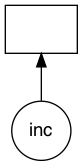

In [33]:
a.visualize()

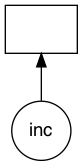

In [34]:
b.visualize()

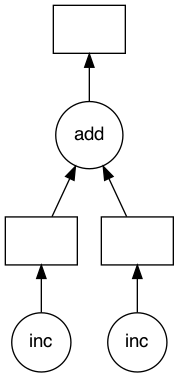

In [35]:
c.visualize()

In [36]:
d = delayed(inc)(3)

In [37]:
c = delayed(add)(a, b, d)

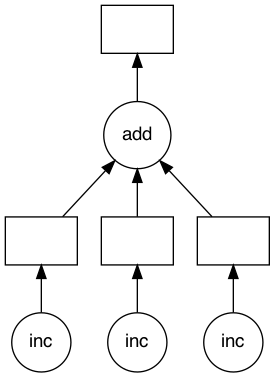

In [38]:
c.visualize()

In [39]:
%%time
c.compute()

CPU times: user 3.72 ms, sys: 2.65 ms, total: 6.37 ms
Wall time: 2.01 s


9

![](task-graph.png)

## Dask Cluster on Coiled

In [40]:
import coiled

In [41]:
cluster = coiled.Cluster(
    name="dask-tutorial", 
    n_workers=20, 
    worker_memory='25Gib',
    software="rrpelgrim/dask-mini-tutorial",
    scheduler_options={'idle_timeout':'3 hours'}, # default is 20min
    shutdown_on_close=False,
    backend_options={'spot': 'True'},
)

Output()

Found software environment build
Created fw rule: inbound [8786-8787] [0.0.0.0/0] []
Created FW rules: coiled-dask-rrpelgr71-102385-firewall
Created fw rule: cluster [0-65535] [None] [coiled-dask-rrpelgr71-102385-firewall -> coiled-dask-rrpelgr71-102385-firewall]
Created FW rules: coiled-dask-rrpelgr71-102385-cluster-firewall
Created fw rule: inbound [0-65535] [None] [unknown fw]
Created scheduler VM: coiled-dask-rrpelgr71-102385-scheduler (type: t3.medium, ip: ['3.219.242.158'])


In [42]:
from distributed import Client

client = Client(cluster)
client

<Client: 'tls://10.4.9.220:8786' processes=10 threads=80, memory=310.94 GiB>

In [43]:
import dask.dataframe as dd

In [44]:
df = dd.read_csv(
    "s3://nyc-tlc/trip data/yellow_tripdata_2019-*.csv",
    parse_dates=["tpep_pickup_datetime", "tpep_dropoff_datetime"],
    dtype={
        "payment_type": "UInt8",
        "VendorID": "UInt8",
        "passenger_count": "UInt8",
        "RatecodeID": "UInt8",
        "store_and_fwd_flag": "category",
        "PULocationID": "UInt16",
        "DOLocationID": "UInt16",
    },
    storage_options={"anon": True},
    blocksize="16 MiB",
)

In [45]:
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
npartitions=471,,,,,,,,,,,,,,,,,,
,UInt8,datetime64[ns],datetime64[ns],UInt8,float64,UInt8,category[unknown],UInt16,UInt16,UInt8,float64,float64,float64,float64,float64,float64,float64,float64
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


In [46]:
%%time
df.groupby("passenger_count").tip_amount.mean().compute()

CPU times: user 345 ms, sys: 99.2 ms, total: 445 ms
Wall time: 52.3 s


passenger_count
0    2.122789
1    2.206790
2    2.214306
3    2.137775
4    2.023804
5    2.235441
6    2.221105
7    6.675962
8    7.111625
9    7.377822
Name: tip_amount, dtype: float64